In [9]:
# Zadanie 1: sprawdź poniżej inne elementy wczytanego zbioru danych, w szczególności opis.
# Opisz w max 3 zdaniach swoimi słowami co zawiera zbiór danych

from sklearn import datasets

# Wczytaj przykładowy zbiór danych - dane dotyczące trzech gatunków Irysów
iris = datasets.load_iris()

# Wyświetl opis:
print(iris['DESCR'])

# Wyświetl liste nazw kwiatów
for x in range (0,len(iris['data']),10):
    print("Kwiat nr", x, "w zbiorze to", iris['target_names'][iris['target'][x]],", a jego wymiary to:")
    print("długość kielicha:",iris['data'][x][0],", szerokość kileicha:",iris['data'][x][1],
          ", długość płatka:",iris['data'][x][2],", szerokość płatka:",iris['data'][x][3])

# Zbiór danych zawiera
# data - zbiór wymiarów danego kwiatu (kielicha i płatka)
# target - 0,1 lub 2 - przynależność do konkretnej grupy kwiatów
# target_names - nazwy grup kwiatów
# DESCR - opis bazy
# feature_names - angielskie nazwy poszczególnych danych znajdujących się w data
# filename - scieżka i nazwa pliku zawierającego bazę

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

Wybrane wartości: [1, 10, 19, 28, 37, 46, 55, 64, 73]


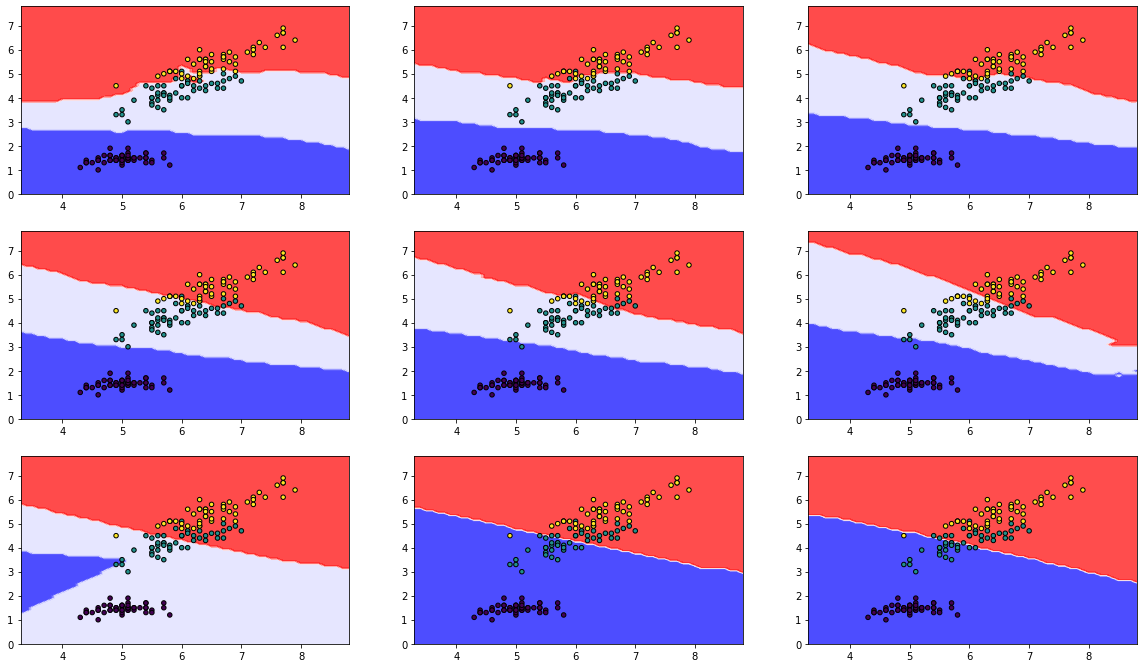

[0.9733333333333334, 0.9733333333333334, 0.9466666666666667, 0.9333333333333333, 0.9333333333333333, 0.88, 0.48, 0.44, 0.44]


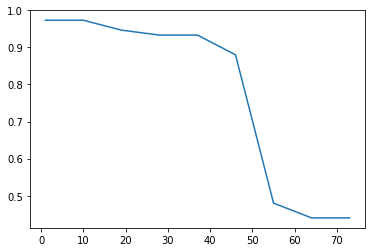

In [10]:
# Zadanie 2:
# Stwórz listę kilku wybranych przez siebie wartości dla parametru n_neighbors
# W pętli 'for' użyj kolejnych wartości parametru do stworzenia klasyfikatora
# Następnie naucz go na danych uczących
# Zapisz wynik scoringu na danych testowych do osobnej listy
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import matplotlib.gridspec as gridspec
from sklearn import datasets

iris = datasets.load_iris()

X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5)

lista_n = []
dokladnosci = []

# tworzę listę wartości dla parametru n_neighbors
for i in range (1,80,9):
  lista_n.append(i)
print('Wybrane wartości:',lista_n)

sx=0
fig = plt.figure(figsize=(20, 20))
gs = gridspec.GridSpec(5, 3)
for el in lista_n:
  knn = KNeighborsClassifier(el)
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)
  dokladnosc = knn.score(X_test, y_test)
  x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  y_min, y_max = X[:, 2].min() - 1, X[:, 2].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
           np.arange(y_min, y_max, 0.1))
  # dodaję dokładność do listy
  dokladnosci.append(dokladnosc)
  knn.fit(X_train[:, [0, 2]], y_train)
  Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  plt.subplot(gs[sx])
  sx+=1
  plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.bwr)
  plt.scatter(X[:, 0], X[:, 2], c=y, s=20, edgecolor='k')
plt.show()

#wykres zależności    
print(dokladnosci)    
%matplotlib inline
plt.plot(lista_n, dokladnosci)
plt.show()

Elementy zbioru:  ['data', 'target', 'target_names', 'DESCR', 'feature_names']


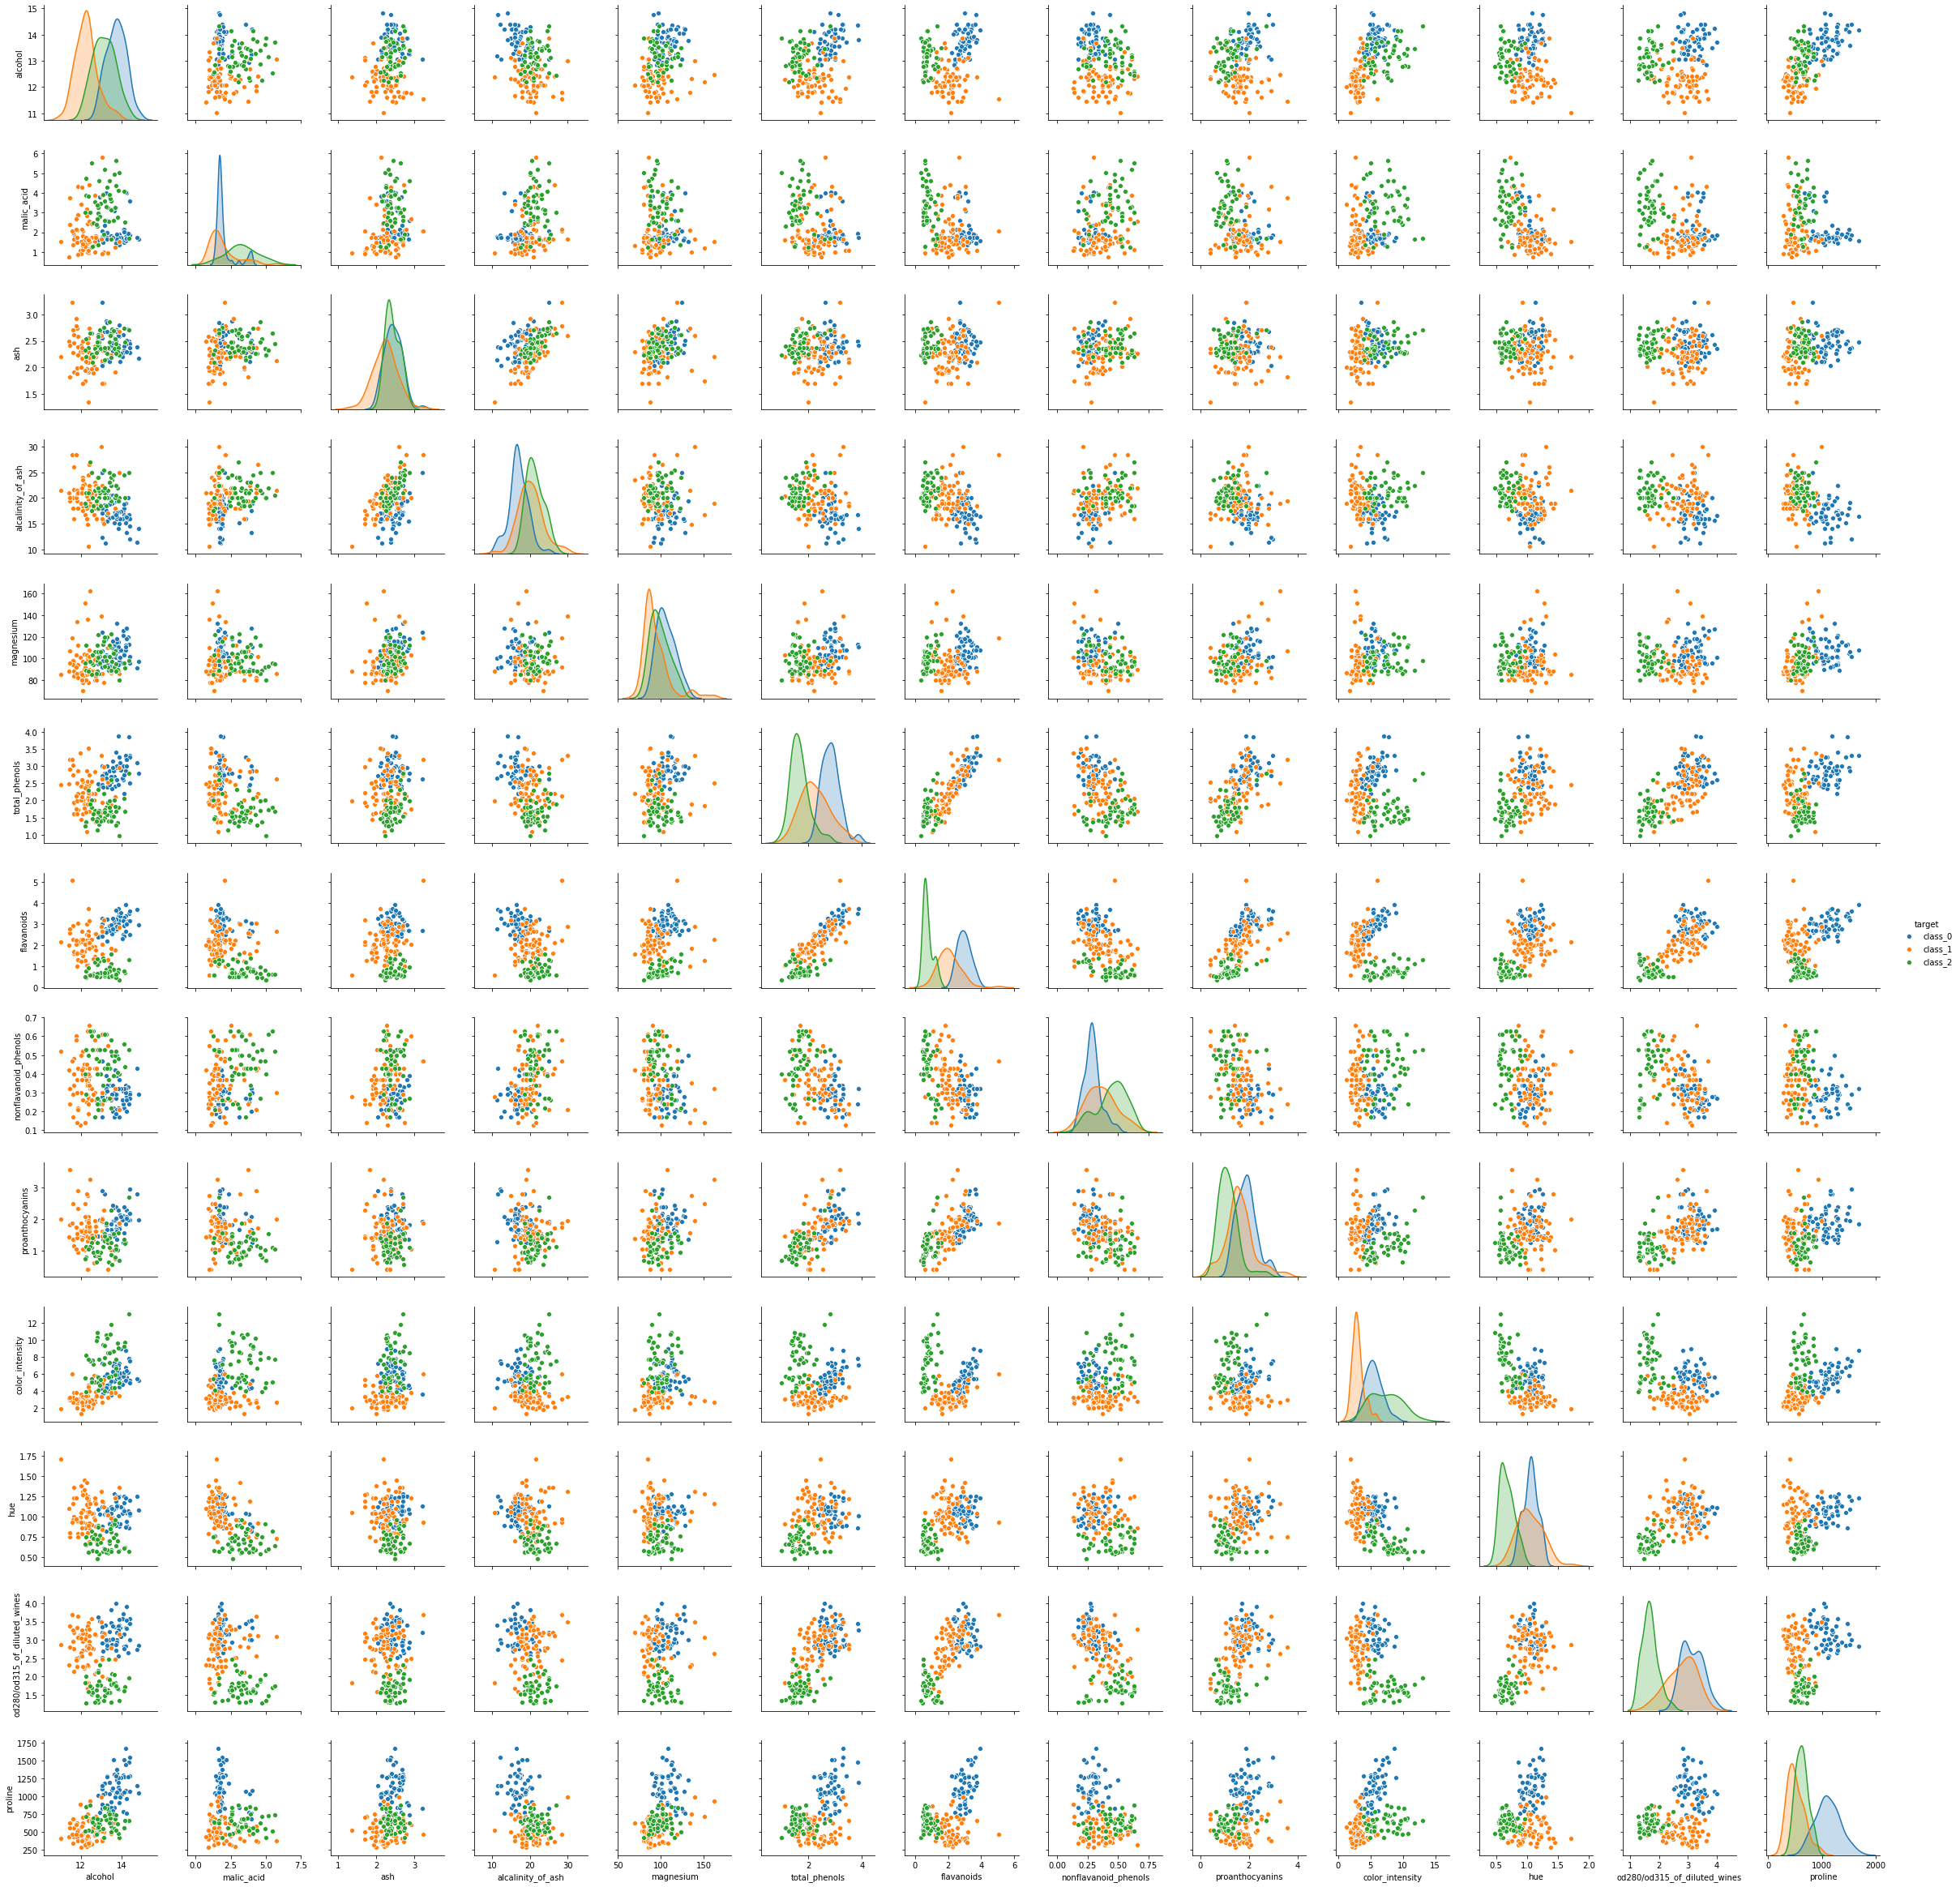

['Wartosci przewidziane: ', array([2, 2, 0, 0, 2, 0, 0])]
['Dokładność klasyfikatora: ', 0.6713286713286714]


confusion matrix:
 [[41  0  7]
 [ 4 22 32]
 [ 1  3 33]]


classification report:
               precision    recall  f1-score   support

           0       0.89      0.85      0.87        48
           1       0.88      0.38      0.53        58
           2       0.46      0.89      0.61        37

    accuracy                           0.67       143
   macro avg       0.74      0.71      0.67       143
weighted avg       0.77      0.67      0.66       143



In [7]:
# Zadanie 3:
# wczytaj dane o winach za pomocą funkcji poniżej
from sklearn.datasets import load_wine
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

wine_data = load_wine()

# Jakie dane mamy w zbiorze
print('Elementy zbioru: ', list(wine_data.keys()))

# Konwersja na data frame
wine_data_df = pd.DataFrame(wine_data['data'], columns=wine_data['feature_names'])

# Podgląd danych
wine_data_df.head()

# Zbadaj zbiór danych. Stwórz wykresy obrazujące ten zbiór danych.

# funkcja która nam zamieni wartości 0, 1, 2 na pełny opis tekstowy dla klasy wina
targets = map(lambda x: wine_data['target_names'][x], wine_data['target'] )

# doklejenie informacji o gatunku do reszty dataframe
wine_data_df['target'] = np.array(list(targets))

# wykres 
# TODO - usunąć komentarz :]
sns.pairplot(wine_data_df, hue='target')
plt.show()

# Podziel zbiór danych na uczący i testowy.
X = wine_data.data
y = wine_data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.8)

# Klasyfikator kNN
knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(X_train, y_train)

# Dokonaj predykcji na zbiorze testowym
y_pred = knn.predict(X_test)

print(["Wartosci przewidziane: ", y_pred[:7]])
print(["Dokładność klasyfikatora: ", knn.score(X_test, y_test)])


# Wypisz raport z uczenia: confusion_matrix oraz classification_report
print("\n\nconfusion matrix:\n",confusion_matrix(y_test, y_pred))
print("\n\nclassification report:\n",classification_report(y_test, y_pred))